# Pandas
KPOP awards and song


In [517]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd
import json
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [518]:
plt.rcParams["figure.figsize"] = (10, 5)


In [519]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


In [520]:
# if os.path.isfile("penalty_data_set_0.csv"):
#     print("loading from file")
# else:
#     filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
#     print("loading from the internet")

filepath = "KPOP awards and song.csv"
k_data = pd.read_csv(filepath)
print("done")


done


In [521]:
k_data.describe(include='all')

,KPOP GROUPS,GENERATION,MEMBERS,DEBUT YEAR,FANDOM NAME,POP SONGS,DISBANDED,AWARDS,NOMINATIONS,TOTAL SONGS
count,54,54.000000,54.000000,54.000000,52,54,14.000000,54.000000,53.000000,54.000000
unique,54,NaN,NaN,NaN,51,54,NaN,NaN,NaN,NaN
top,BTS,NaN,NaN,NaN,NCTzen,Run BTS,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,2,1,NaN,NaN,NaN,NaN
mean,NaN,2.851852,6.796296,2013.018519,NaN,NaN,2016.642857,49.796296,110.132075,66.518519
std,NaN,0.762504,3.455265,6.406043,NaN,NaN,6.380344,72.570169,117.485030,49.149652
min,NaN,1.000000,2.000000,1991.000000,NaN,NaN,1996.000000,2.000000,3.000000,4.000000
25%,NaN,2.000000,4.250000,2009.000000,NaN,NaN,2016.250000,13.000000,24.000000,25.000000
50%,NaN,3.000000,6.000000,2015.000000,NaN,NaN,2017.000000,31.000000,82.000000,58.000000
75%,NaN,3.000000,8.000000,2017.750000,NaN,NaN,2020.250000,57.500000,160.000000,95.750000


Text(0.5, 1.0, 'Kpop Idols Achievements')

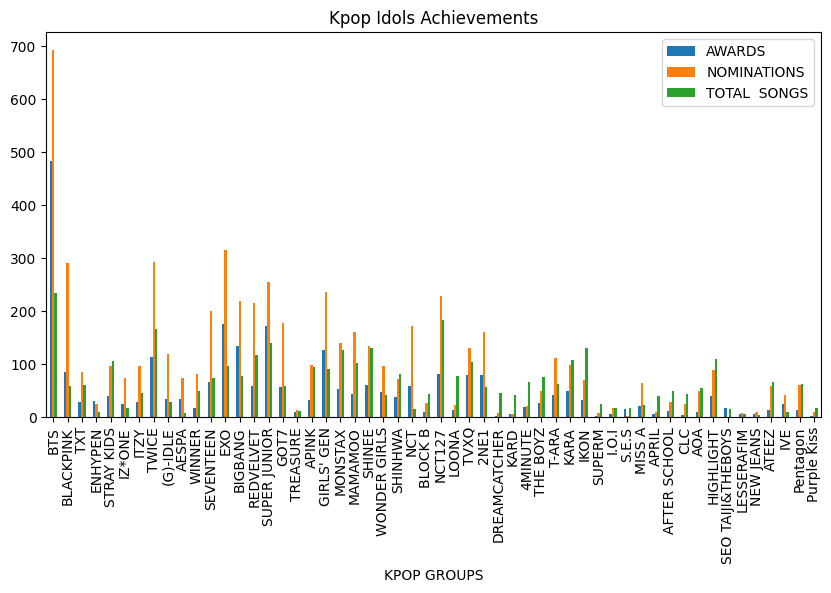

In [523]:
#The achievements including awards, nominations and number of songs, last updated in 2021/2022
k_data[["KPOP GROUPS", "AWARDS", "NOMINATIONS", 'TOTAL  SONGS']].plot.bar(x="KPOP GROUPS")
plt.title('Kpop Idols Achievements')

Text(0.5, 1.0, 'Kpop Members Scatter')

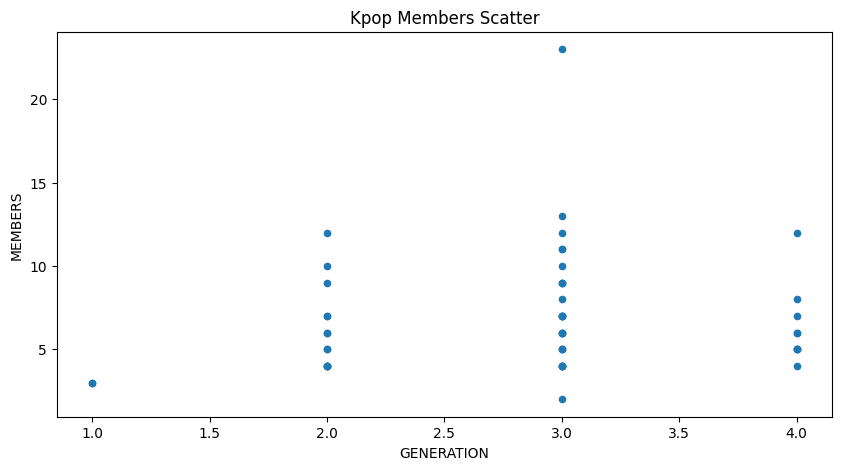

In [636]:
#Kpop members in relation to generation
k_data.plot.scatter(x="GENERATION", y="MEMBERS")
plt.title('Kpop Members Scatter')

Text(0, 0.5, 'MEMBERS')

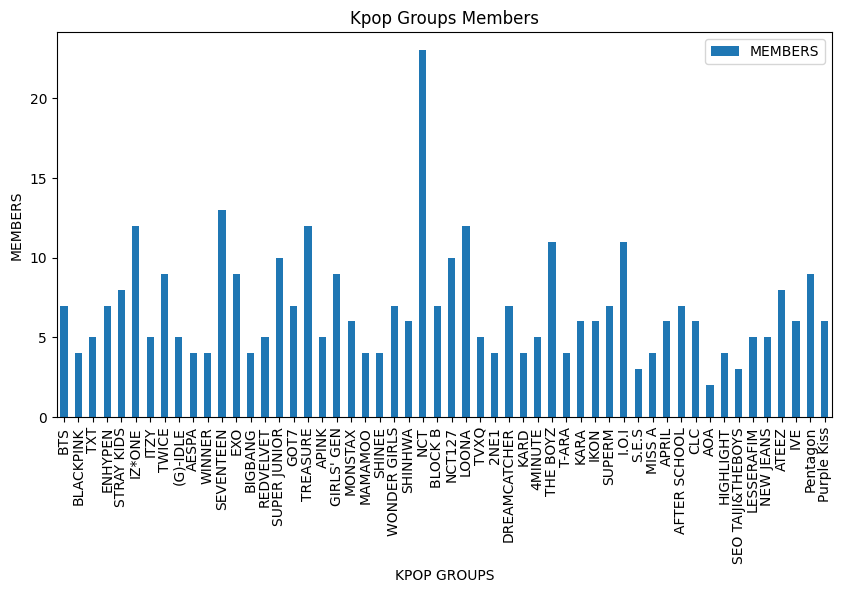

In [680]:
k_data[["KPOP GROUPS", "MEMBERS"]].plot.bar(x="KPOP GROUPS")
plt.title('Kpop Groups Members')
plt.ylabel('MEMBERS')

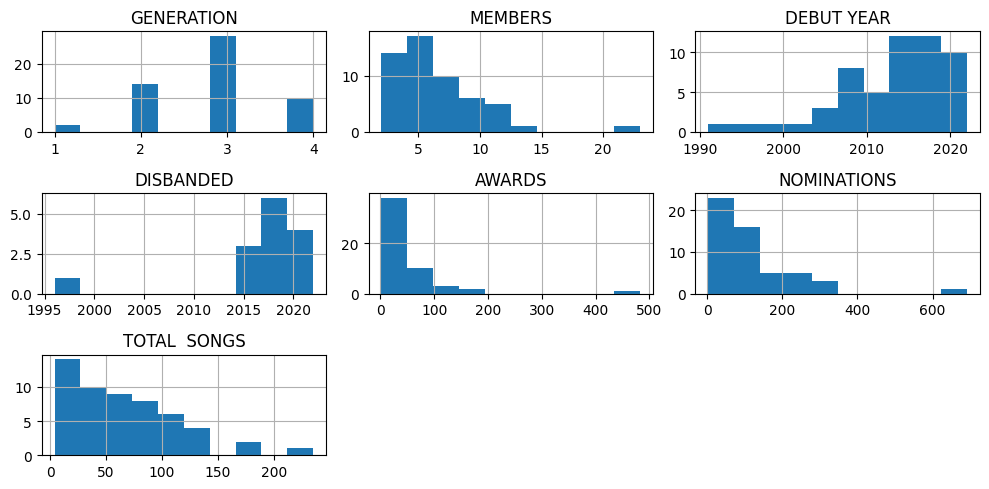

In [686]:
k_data.hist()
plt.tight_layout()

In [683]:
filepath = "KPOP sales.csv"
k_4th = pd.read_csv(filepath)
print("done")

done


In [640]:
k_4th['sales'] = k_4th['sales'].str.replace(',', '').str.strip().astype('int64')

In [641]:
k_4th['date'] = pd.to_datetime(k_4th['date'])

Text(0.5, 1.0, 'Kpop 4th sales')

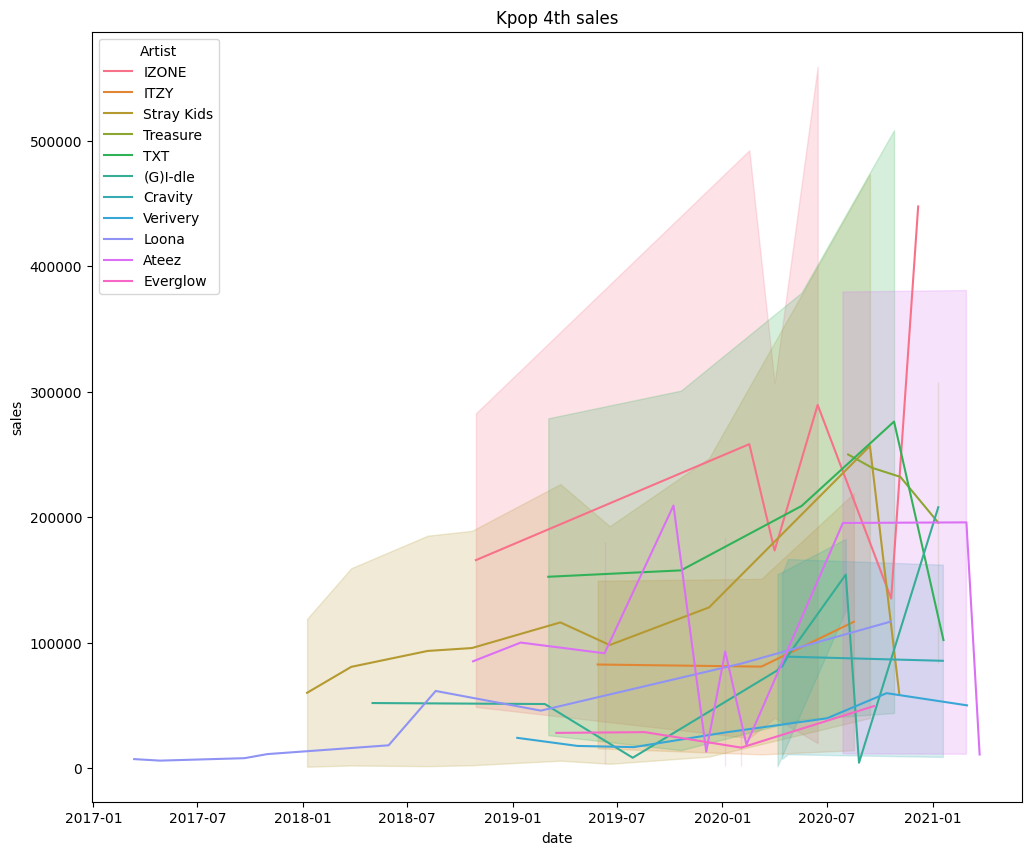

In [642]:
# Visualize kpop-4th-gen sales 
plt.figure(figsize=(12,10))
sns.lineplot(x=k_4th.date, y=k_4th.sales, hue=k_4th.Artist)
plt.title('Kpop 4th sales')



# _birthplace_

In [449]:
#filepath = "KPOP detail.csv"
#k_detail_data = pd.read_csv(filepath)
#print("done")


In [550]:
data = read_csv("KPOP detail.csv")

In [551]:
locationName = data['Birthplace Birthplace'].tolist()

geolocator = Nominatim(user_agent="VSCode")

Count = len(locationName)

 

lat = []; long = []

for i in range(Count):

    print(i)

    if locationName[i] == "nan":

        continue #This will skip this iteration

    try:

        location = geolocator.geocode(locationName[i])

        lat.append(location.latitude)

        long.append(location.longitude)

    except:

        continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [568]:
df = pd.DataFrame({'Lat' : lat, 'Long' : long})    

In [569]:
df.to_csv('Loc.csv', index=False, encoding='utf-8')

In [688]:
filepath = "Loc.csv"
Location = pd.read_csv(filepath)
print("done")

done


In [478]:
for i in range (len(lat)):
    Loc = (lat[i], long[1])
    print (Loc)

(35.8237631, -118.755997)
(36.7014631, -118.755997)
(37.7790262, -118.755997)
(37.456, -118.755997)
(37.6581862, -118.755997)
(35.1594647, -118.755997)
(37.5666791, -118.755997)
(37.5666791, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(37.5666791, -118.755997)
(37.5666791, -118.755997)
(37.5666791, -118.755997)
(34.8159, -118.755997)
(37.5666791, -118.755997)
(37.5666791, -118.755997)
(37.456, -118.755997)
(35.1799528, -118.755997)
(46.3144754, -118.755997)
(37.5666791, -118.755997)
(35.1799528, -118.755997)
(37.5014422, -118.755997)
(36.1195513, -118.755997)
(35.8713, -118.755997)
(35.5391697, -118.755997)
(37.456, -118.755997)
(35.1594647, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(46.3144754, -118.755997)
(37.2633325, -118.755997)
(35.

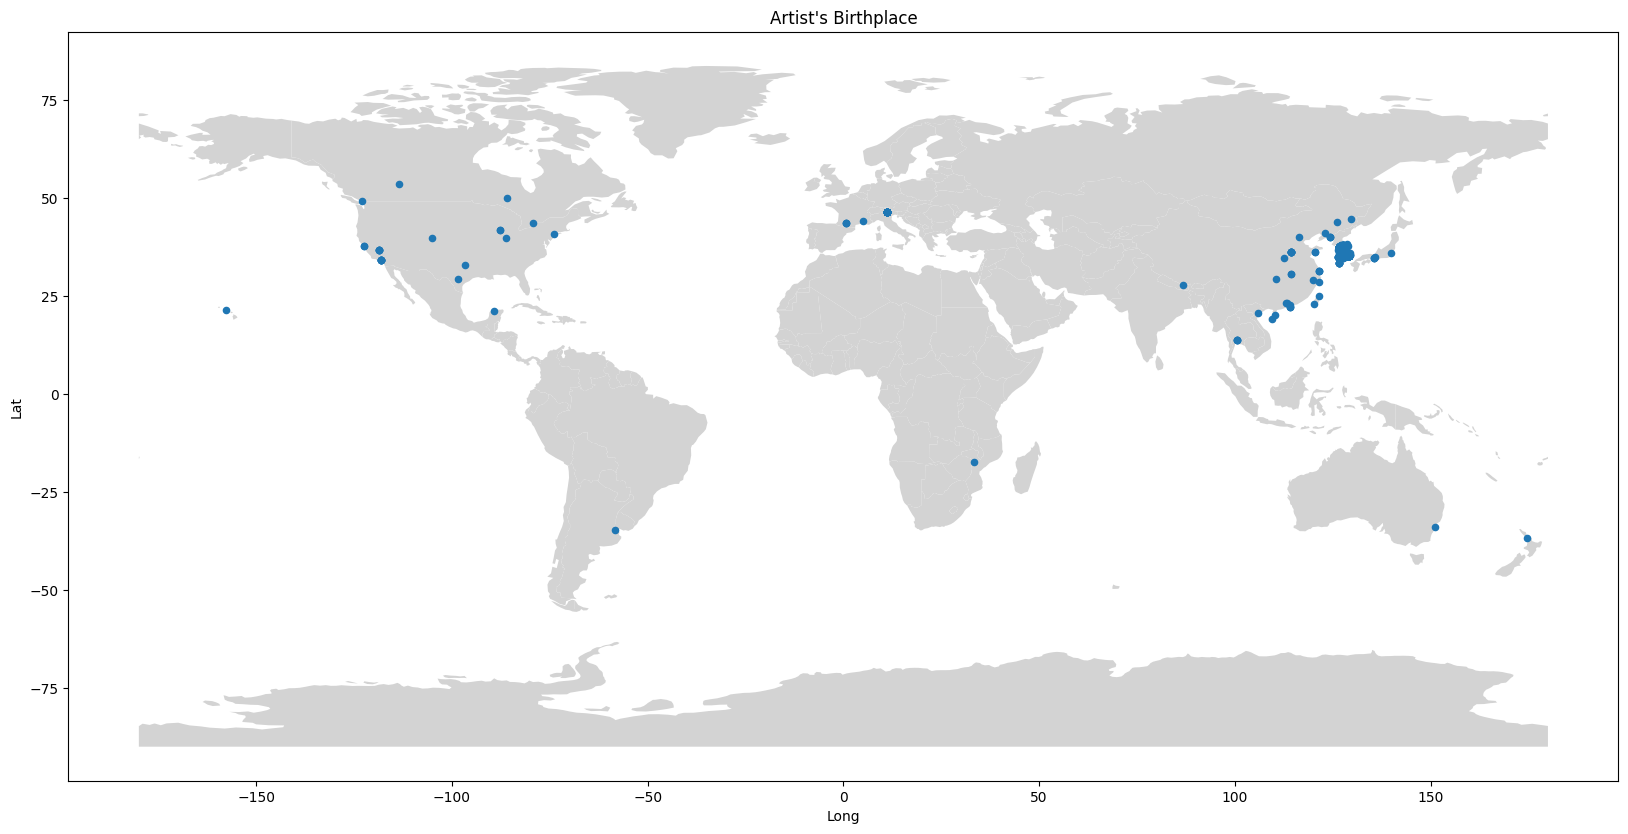

In [687]:
fig, ax = plt.subplots(figsize=(20,10))
# plot map on axis
countries.plot(color="lightgrey", ax=ax)
# plot points
Location.plot.scatter(x = "Long", y = "Lat", ax=ax)
plt.title("Artist's Birthplace")
plt.show()

In [608]:
filepath = "Kpop with locations.csv"
k_location = pd.read_csv(filepath)
print("done")

done


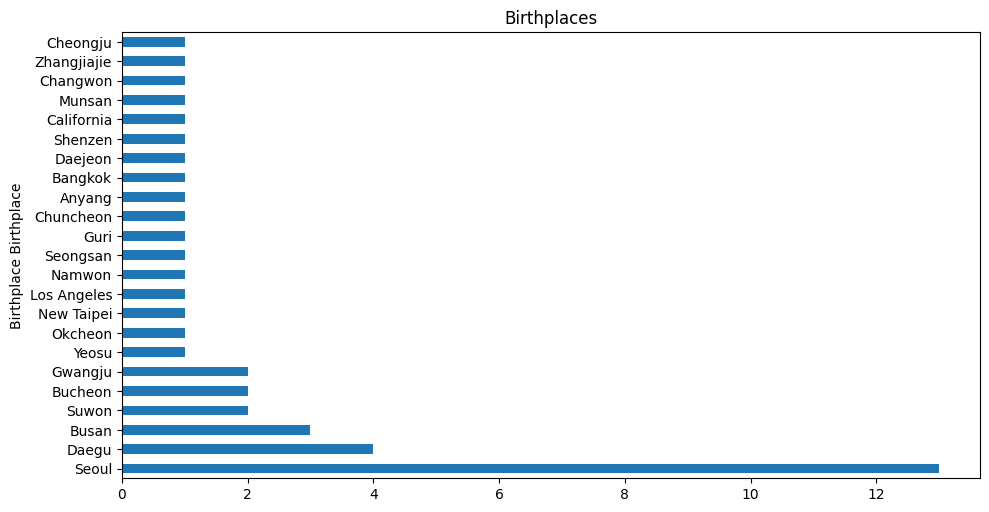

In [629]:
k_location["Birthplace Birthplace"].value_counts().plot(kind="barh")
plt.tight_layout()
plt.title("Birthplaces")
plt.show()

In [631]:
filepath = "kpopidolsv3.csv"
df = pd.read_csv(filepath)
print("done")

done


In [634]:
company_count = df['Company'].value_counts()
company_count = company_count[:10,]
company_count

Company
SM          58
JYP         56
FNC         52
Starship    44
YG          41
Cube        37
Woollim     37
DSP         30
Pledis      29
TS          26
Name: count, dtype: int64

In [491]:
df_idol = df[['Group','Company']]
df_idol.head(20)

,Group,Company
0,7 O'clock,Jungle
1,Limitless,ONO
2,VAV,A team
3,Hash Tag,LUK
4,MOMOLAND,Double Kick
5,Favorite,Astory
6,BABYMONSTER,YG
7,BOTOPASS,WKS ENE
8,Queenz Eye,Big Mountain
9,Dal Shabet,Happy Face


In [492]:
df_idol_count = df_idol.groupby(['Company'])['Group'].count().reset_index(name='count')

In [493]:
df_idol_count = df_idol_count.sort_values(by='count',ascending=False).head(20)
df_idol_count

,Company,count
143,SM,58
84,JYP,56
55,FNC,52
154,Starship,44
171,YG,41
168,Woollim,37
41,Cube,37
44,DSP,30
133,Pledis,29
157,TS,26


In [494]:
df_idol_count = df_idol_count.sort_values(by='count',ascending=False).head(10)
df_idol_count

,Company,count
143,SM,58
84,JYP,56
55,FNC,52
154,Starship,44
171,YG,41
168,Woollim,37
41,Cube,37
44,DSP,30
133,Pledis,29
157,TS,26


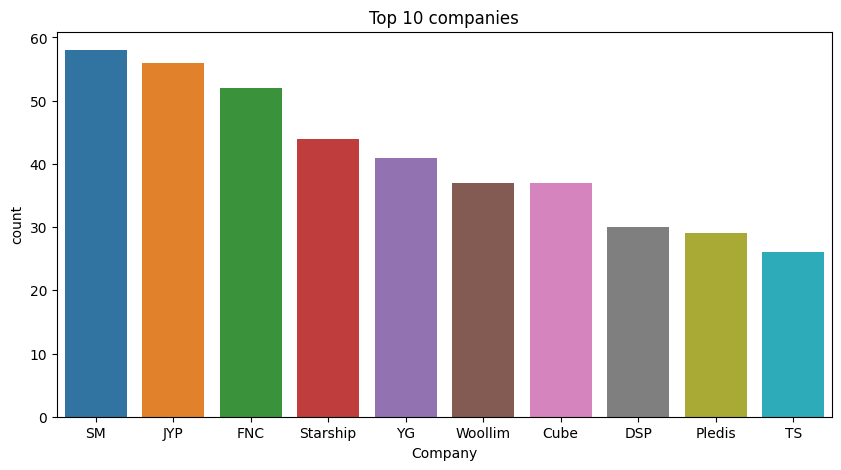

In [648]:
#Top 10 companies have the most boy bands/girl groups in Kpop industry.
#Number of Kpop groups in each company.
sns.barplot(x=df_idol_count['Company'],y=df_idol_count['count'],data=df_idol_count)
plt.title("Top 10 companies")
plt.show()

In [497]:
df_2country = df.loc[df['Second Country'].notna()]
df_2country

,Stage Name,Full Name,Korean Name,K Stage Name,Date of Birth,Group,Debut,Company,Country,Second Country,Height,Weight,Birthplace,Other Group,Former Group,Gender
11,Ailee,Lee Yejin,이예진,에일리,30/05/1989,NaN,NaN,NaN,South Korea,USA,165.0,NaN,Denver,NaN,NaN,F
15,Alex,Alexander Schmidt Lee,알렉산더 슈미트 리,알렉스,6/10/2004,DRIPPIN,26/10/2020,Woollim,Germany,South Korea,180.0,NaN,NaN,NaN,NaN,M
19,Allen,Allen Ma,앨런 마,앨런,26/04/1999,CRAVITY,14/04/2020,Starship,USA,South Korea,NaN,NaN,NaN,NaN,NaN,M
20,Amber,Amber Josephine Liu,엠버 조세핀 리우,엠버,18/09/1992,f(x),5/09/2009,SM,USA,Taiwan,167.0,NaN,Los Angeles,NaN,NaN,F
25,Anthony,Anthony Lo,엔써니 루오,엔써니,12/03/1998,VARSITY,5/01/2017,GKC,China,USA,179.0,NaN,NaN,NaN,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,Tina,Christine Joy Park,크리스틴 조이 박,티나,1/09/1994,Blady,16/05/2011,Star Planet,USA,South Korea,NaN,NaN,Los Angeles,NaN,NaN,F
1506,Vernon,Choi Hansol,최한솔,버논,18/02/1998,Seventeen,26/05/2015,Pledis,USA,South Korea,176.0,56.0,New York,NaN,NaN,M
1697,Young K,Kang Young-hyun,강영현,영케이,19/12/1993,DAY6,7/09/2015,JYP,South Korea,Canada,NaN,NaN,NaN,NaN,NaN,M
1721,Yue,Nancy Yang,낸시 양,유에,3/07/2004,Lapillus,22/06/2022,MLD,USA,China,163.0,48.0,NaN,NaN,NaN,F


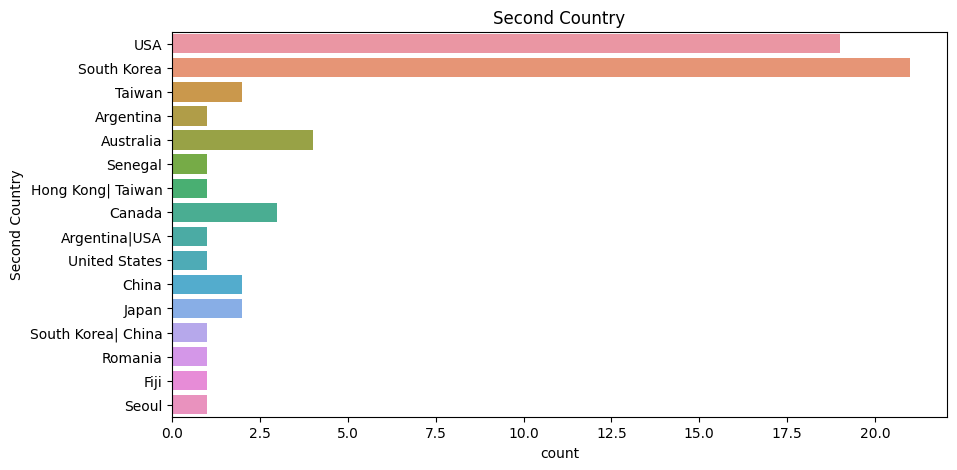

In [669]:
sns.countplot(y = 'Second Country',data = df_2country)
plt.title("Second Country")
plt.show()

Text(0.5, 1.0, 'Common Second Country in Kpop')

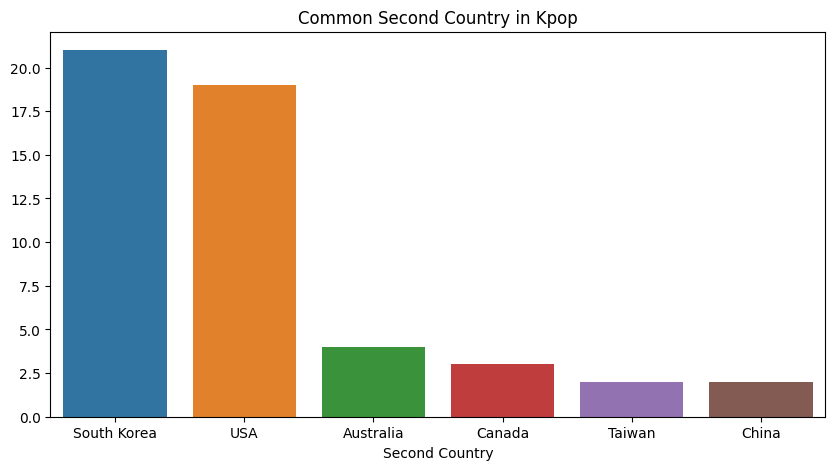

In [673]:
#Top 6 Countries that are Second Country for Kpop artists
twocountry_count = df_2country['Second Country'].value_counts()
twocountry_count = twocountry_count[:6,]
sns.barplot(x=twocountry_count.index,y=twocountry_count.values)
plt.title("Common Second Country in Kpop")

<Axes: xlabel='Gender', ylabel='count'>

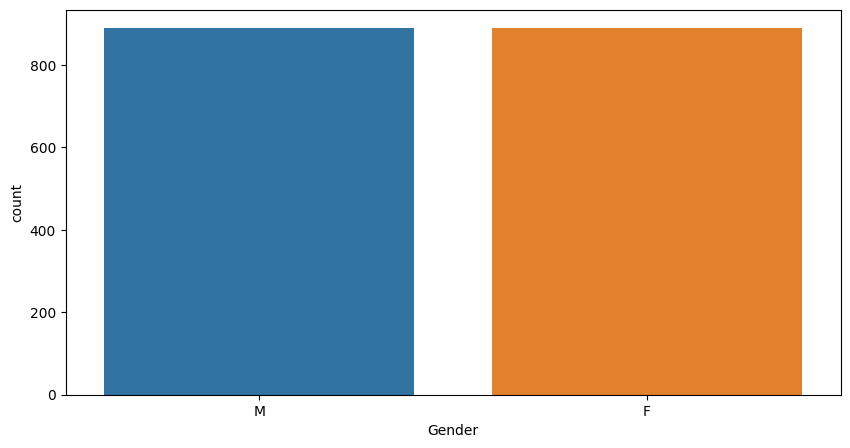

In [677]:
#Gender
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Height'>

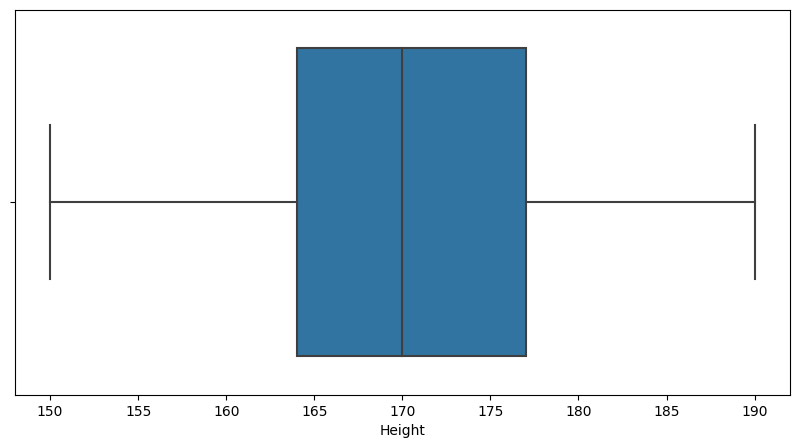

In [678]:
sns.boxplot(x='Height',data=df)

<Axes: xlabel='Weight'>

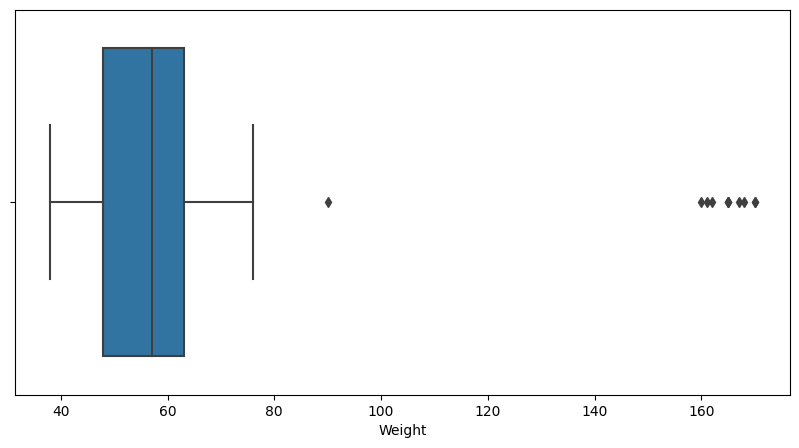

In [679]:
sns.boxplot(x='Weight',data=df)